Set card images
---

Based on images from [The Daily SET](https://www.setgame.com/set/puzzle).


In [1]:
import os
from skimage import io, data, transform
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('dark_background')
matplotlib.rcParams['font.size'] = 12

In [2]:
image_path = '../images/'
card_images = [
    io.imread(image_path + file_name)
    for file_name in os.listdir(image_path)[:-1]
]

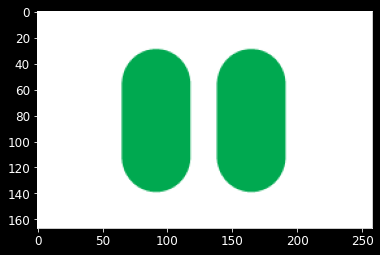

In [3]:
plt.imshow(card_images[-1]);

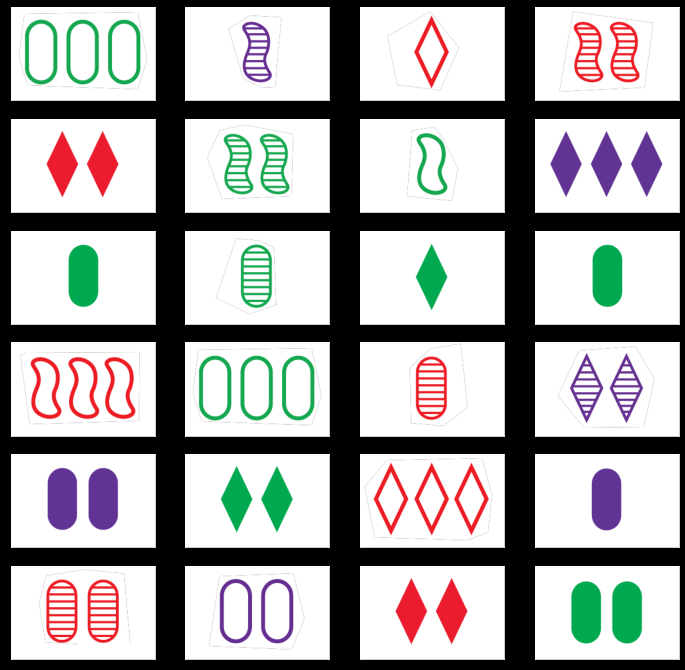

In [4]:
fig, axes = plt.subplots(6,4, figsize = (12,12))
row = 0
col = 0
for image in card_images:
    axes[row, col].imshow(image)
    col += 1
    col = col%len(axes[0])
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])
    if col == 0:
        row += 1
    

### Transforming images

[types of homographies](https://scikit-image.org/docs/dev/auto_examples/transform/plot_transform_types.html#sphx-glr-auto-examples-transform-plot-transform-types-py)

In [5]:
tform = transform.EuclideanTransform(
    rotation = np.pi/5.,
    translation = (50,26)
)
print(tform.params)

[[ 0.80901699 -0.58778525 50.        ]
 [ 0.58778525  0.80901699 26.        ]
 [ 0.          0.          1.        ]]


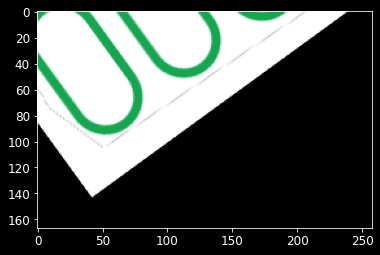

In [6]:
tf_image = transform.warp(card_images[0], tform)
plt.imshow(tf_image);

### Affine transformation
Using shear+rotation+scaling to simulate a random orientation in 3d for a card. This will not work in extreme perspectives. This won't generate the image from a close-up camera (or of a very large card).

In [7]:
seed = 123
rng = np.random.default_rng(seed)

rot_max = np.pi*.008
shear_max = np.pi
scale_max = 20
translate_x_max = 150
translate_y_max = -300

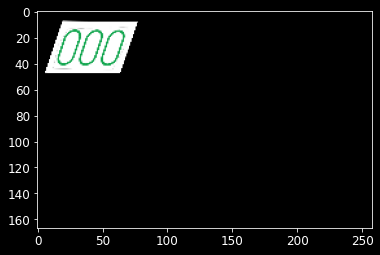

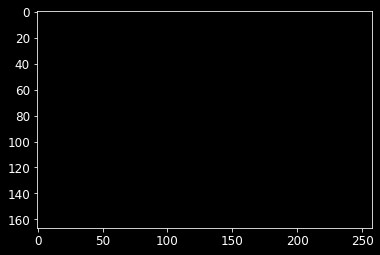

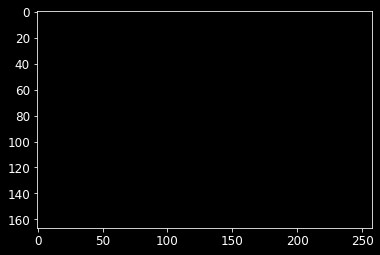

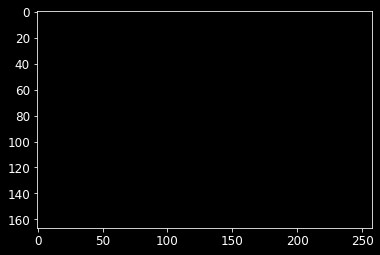

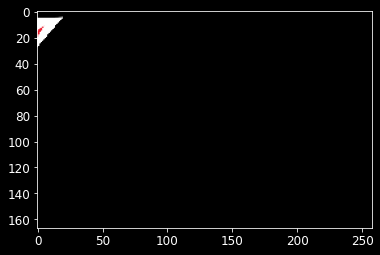

In [8]:
num_images = 5
for image in card_images[:num_images]:
    this_rotation = rng.uniform(-1,1)*rot_max
    this_shear = rng.uniform(-1,1)*shear_max
    this_scale = rng.uniform(0,1)*scale_max
    this_translation = rng.uniform(-1,1)*translate_x_max, rng.uniform(-1,1)*translate_y_max
    this_tf = transform.AffineTransform(rotation = this_rotation,
                                       shear = this_shear,
                                       scale = this_scale,
                                       translation=this_translation
                                       )
    this_tf_image = transform.warp(image, this_tf)
    plt.figure()
    plt.imshow(this_tf_image)

In [9]:
# better to rotate, then translate into the image.

In [99]:
seed = 123
rng = np.random.default_rng(seed)

rot_max = 360
shear_max = np.pi/999
scale_max = 20
translate_x_max =0
translate_y_max = 0

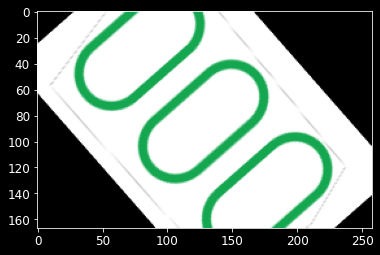

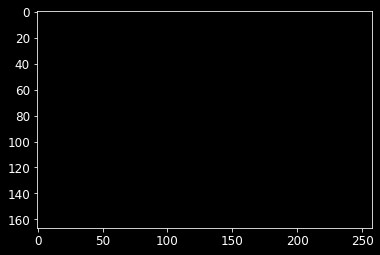

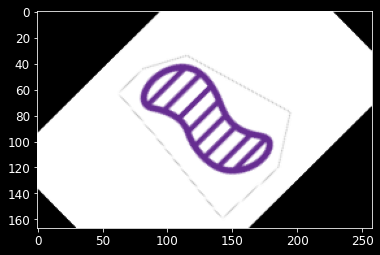

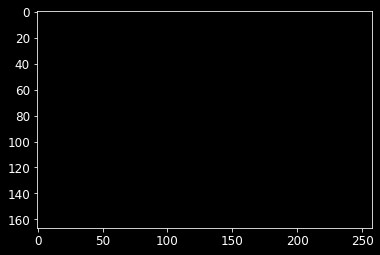

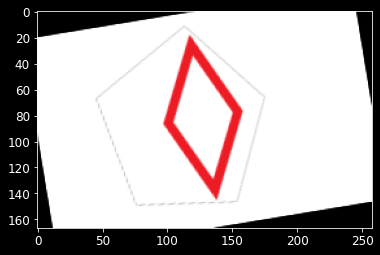

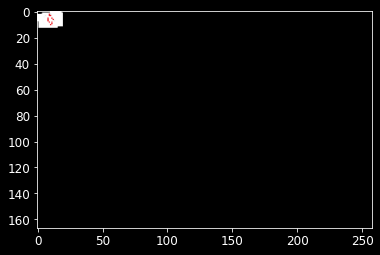

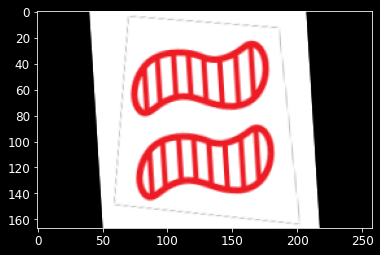

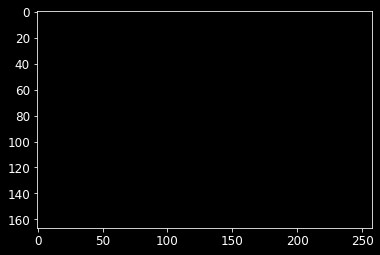

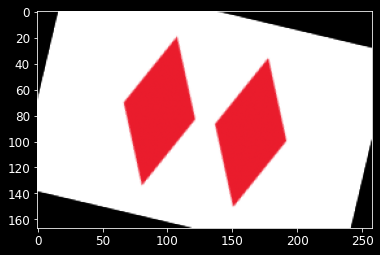

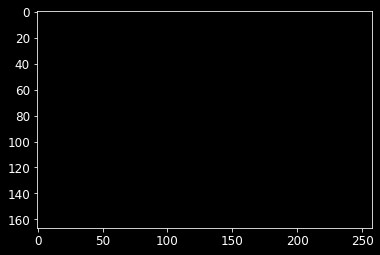

In [11]:
num_images = 5
for image in card_images[:num_images]:
    this_rotation = rng.uniform(-1,1)*rot_max
    this_shear = rng.uniform(-1,1)*shear_max
    this_scale = rng.uniform(-1,1)*scale_max
    this_translation = rng.uniform(0,1)*translate_x_max, rng.uniform(0,1)*translate_y_max
    this_tf = transform.AffineTransform(
                                       shear = this_shear,
                                       scale = this_scale
                                       )
    this_tf_2 = transform.EuclideanTransform(translation=this_translation)
    
    #rotate about center
    this_tf_image = transform.rotate(image, this_rotation)
    plt.figure()
    plt.imshow(this_tf_image)
    #shear and scale
    this_tf_image = transform.warp(this_tf_image, this_tf)
    #translate
    this_tf_image =  transform.warp(this_tf_image, this_tf_2)
    plt.figure()
    plt.imshow(this_tf_image)

In [12]:
# no clipping please!

In [130]:
seed = 123
rng = np.random.default_rng(seed)


#warp uses the inverse.
rot_max = 360
shear_max = np.pi/999
scale_max = 0.3
translate_x_max = card_images[0].shape[1]//2
translate_y_max = card_images[0].shape[0]//2

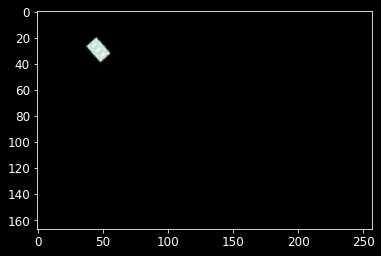

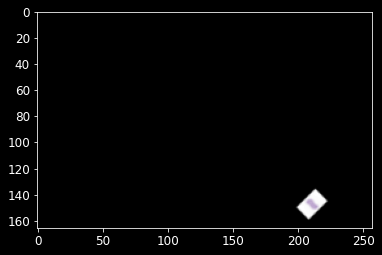

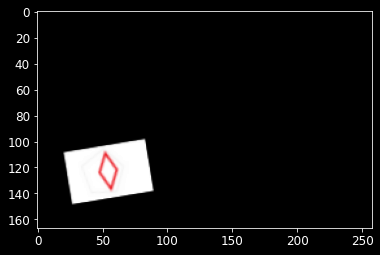

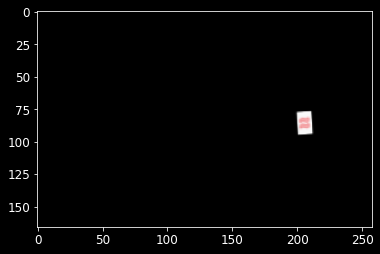

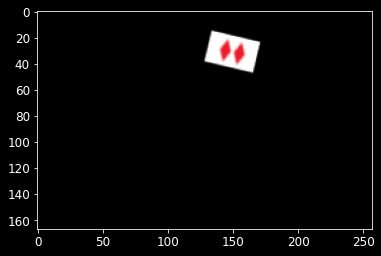

In [132]:
num_images = 5
for image in card_images[:num_images]:
    this_rotation = rng.uniform(-1,1)*rot_max
    this_shear = rng.uniform(-1,1)*shear_max
    this_scale = rng.uniform(0,1)*scale_max
    this_translation = rng.uniform(-1,1)*translate_x_max, rng.uniform(-1,1)*translate_y_max
    #make transformations
    tf_scale = transform.SimilarityTransform(scale = this_scale)
    
    #scale it. multichannel for alpha channel (image with 4 values per pixel)
    this_tf_image = transform.rescale(image, this_scale, multichannel = True)
    #add padding to restore original image size
    pad_x = image.shape[0] - this_tf_image.shape[0]
    pad_y = image.shape[1] - this_tf_image.shape[1]
    this_tf_image = np.pad(this_tf_image,((pad_x//2,pad_x//2),(pad_y//2,pad_y//2),(0,0)))
    #rotate about center
    this_tf_image = transform.rotate(this_tf_image, this_rotation)
    #translate
    tf_translate = transform.SimilarityTransform(translation = this_translation)
    this_tf_image = transform.warp(this_tf_image, tf_translate.inverse)
    #show
    plt.figure()
    plt.imshow(this_tf_image)